In [1]:
import numpy as np
import pandas as pd
import gurobipy as gp
import math
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ortho_group
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 15 # 全体のフォントサイズ


In [2]:
import LCP_FS   # Facchinei and Soares
import LCP_FW   # Frank-Wolfe
import LCP_FISTA  # Nesterov
import LCP_DCA  # DCA
import LCP_DCAE # DCA Eig
import LCP_DCAT # DCA Tri

import importlib
importlib.reload(LCP_FS)
importlib.reload(LCP_FW)
importlib.reload(LCP_FISTA)
importlib.reload(LCP_DCA)
importlib.reload(LCP_DCAE)
importlib.reload(LCP_DCAT)

<module 'LCP_DCAT' from 'C:\\Users\\TAKALA\\Documents\\DTA\\work\\20210803_LCP\\LCP_DCAT.py'>

In [150]:
N = 20
P = np.random.dirichlet(np.ones(N), N)
r = np.random.rand(N)*10
alpha = 0.8
M = np.eye(N) - alpha*P
b = (np.eye(N) - alpha*P)@r

In [151]:
%%time
# Newton method by Facchinei and Soares
FS_model = LCP_FS.model(M, b)
FS_x, FS_merit = FS_model.solve(err=10**(-6), max_itr=100)

Wall time: 4.02 ms


In [152]:
%%time
importlib.reload(LCP_FW)
# Frank-wolfe method
FW_model = LCP_FW.model(M, b)
FW_x, FW_x_list = FW_model.solve(err=10**(-6), max_itr=100)

Wall time: 6.04 ms


In [153]:
%%time
importlib.reload(LCP_DCAE)
DCAE_model = LCP_DCAE.model(M, b)

DCAE_x, DCAE_x_list = DCAE_model.solve(err=10**(-6), max_itr=100)
# DCAE_x, DCAE_x_list = DCAE_model.solve(x0=np.ones(N), err=10**(-6), max_itr=50)

-1.4210854715202004e-14
Break-code-1
Wall time: 7.53 ms


In [154]:
%%time
importlib.reload(LCP_DCAT)
DCAT_model = LCP_DCAT.model(M, b)

DCAT_x, DCAT_x_list = DCAT_model.solve(err=10**(-6), max_itr=100)

Wall time: 3 ms


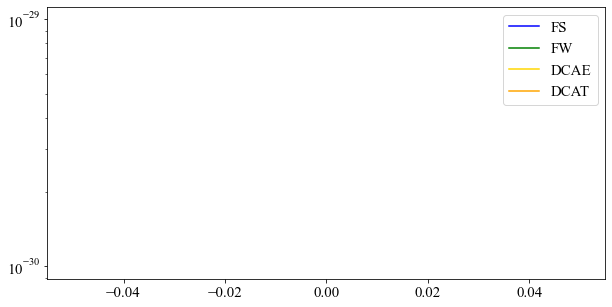

In [155]:
plt.figure(figsize=(10,5))
# plt.axis([0,5,0.01,100])
# plt.plot(Luca_merit, label='Luca', color='orange')
plt.plot(FS_merit, label='FS', color='blue')
plt.plot([FS_model.Psi(xx) for xx in FW_x_list], label='FW', color='green')
# plt.plot([FS_model.Psi(xx) for xx in FISTA_F_x_list], label='FISTA_F', color='red')
# plt.plot([FS_model.Psi(xx) for xx in FISTA_M_x_list], label='FISTA_M', color='pink')
plt.plot([FS_model.Psi(xx) for xx in DCAE_x_list], label='DCAE', color='gold')
plt.plot([FS_model.Psi(xx) for xx in DCAT_x_list], label='DCAT', color='orange')
plt.yscale('log')
plt.legend()

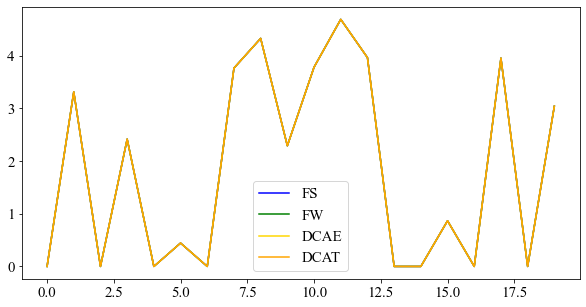

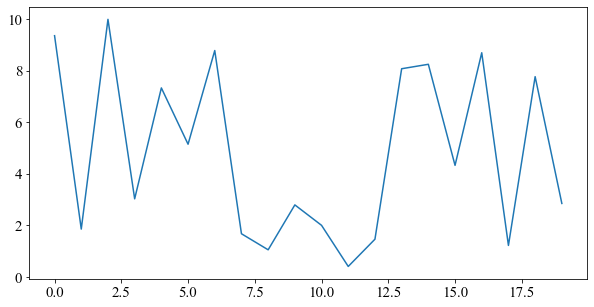

In [156]:
plt.figure(figsize=(10,5))
# plt.xticks(range(len(FS_x)), range(len(FS_x)))
# plt.plot(Luca_x, label='Luca', color='orange')
plt.plot(FS_x, label='FS', color='blue')
plt.plot(FW_x, label='FW', color='green')
# plt.plot(FISTA_F_x, label='FISTA_F', color='red')
# plt.plot(FISTA_M_x, label='FISTA_M', color='pink')
plt.plot(DCAE_x, label='DCAE', color='gold')
plt.plot(DCAT_x, label='DCAT', color='orange')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(r)